In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.model_selection import ExpandingWindowSplitter
from sktime.forecasting.model_evaluation import evaluate

In [2]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.arima import AutoARIMA

In [3]:
def plot_series(*args, title="Time Series Plot", xlabel="Date", ylabel="Value", figsize=(20, 8)):
    # Personalizzazione del formato delle date sull'asse x
    fig, ax = plt.subplots(figsize=figsize)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    # Plot delle serie temporali
    for i, series in enumerate(args):
        if(i==0):
            ax.plot(series.index, series, label=f"Series {i+1}", color='black')
        elif(i==1):
            ax.plot(series.index, series, label=f"Series {i+1}", color='red')
        else:
            ax.plot(series.index, series, label=f"Series {i+1}")
            

    # Aggiunta di etichette e legenda
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()

    # Rotazione delle etichette sull'asse x per migliorare la leggibilità
    plt.xticks(rotation=45)

    # Mostra il grafico
    plt.show()

In [4]:
df = pd.read_csv("DF_Normalizzato_ClasseCreataConSAX.csv")

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Crea l'indice temporale
dates = pd.date_range("1990-07-02", end="2021-12-31", freq="D")

## Forecasting sul PETROLIO senza variabili esogene

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packa

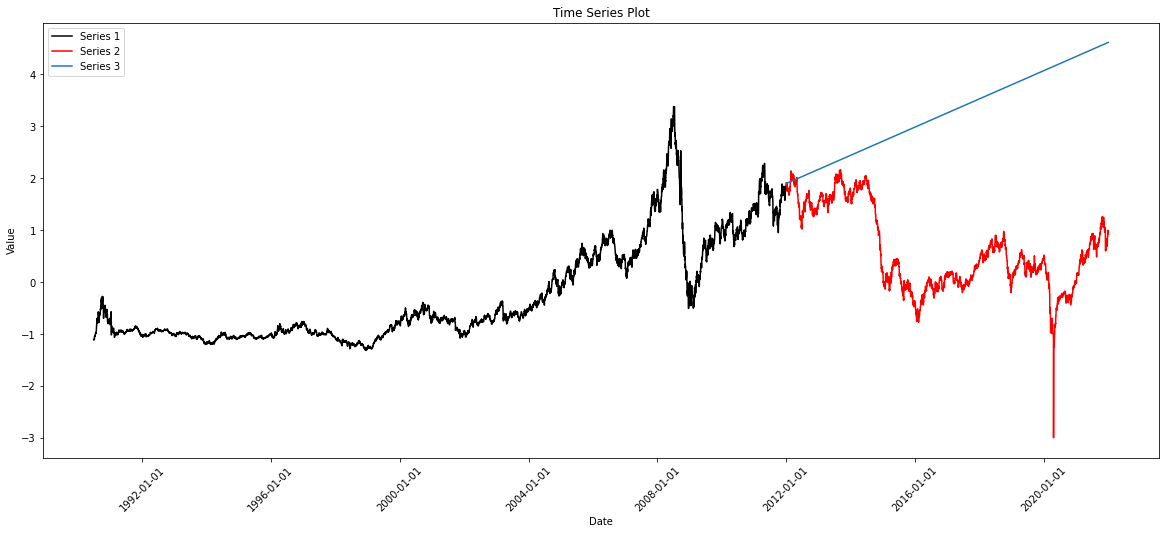

In [5]:
# Seleziona la variabile target (PETROLIO) e le variabili esogene (ORO)
y = df['PETROLIO']

# Riempie i valori mancanti con il metodo di riempimento in avanti
y = pd.Series(y, index=dates).fillna(method='ffill')

# Crea la ForecastingHorizon
fh = ForecastingHorizon(np.arange(3650) + 1)

# Suddividi i dati in set di addestramento e test
y_train, y_test = temporal_train_test_split(y, fh=fh)

forecaster = AutoARIMA()
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred)

## Aggiungo l'oro come variabile esogena

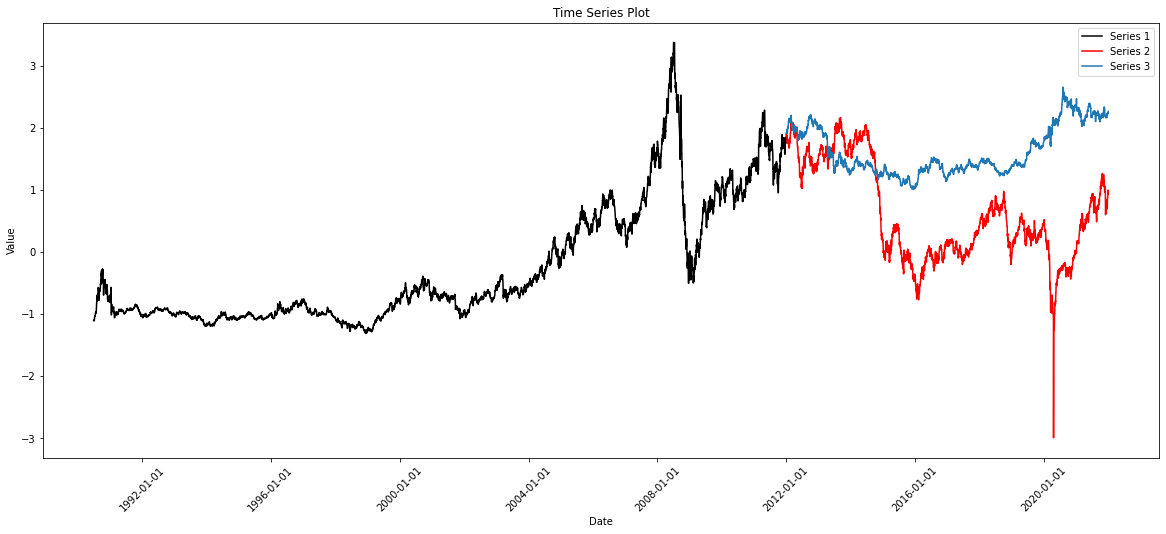

In [6]:
# Seleziona la variabile target (PETROLIO) e le variabili esogene (ORO)
y = df['PETROLIO']
X = df[['ORO']]

# Riempie i valori mancanti con il metodo di riempimento in avanti
y = pd.Series(y, index=dates).fillna(method='ffill')

X = X.reindex(dates).fillna(method='ffill')

# Crea la ForecastingHorizon
fh = ForecastingHorizon(np.arange(3650) + 1)

# Suddividi i dati in set di addestramento e test
y_train, y_test, X_train, X_test = temporal_train_test_split(y, X, fh=fh)

forecaster = AutoARIMA()
forecaster.fit(y_train, X_train)
y_pred = forecaster.predict(fh, X=X_test)

plot_series(y_train, y_test, y_pred)

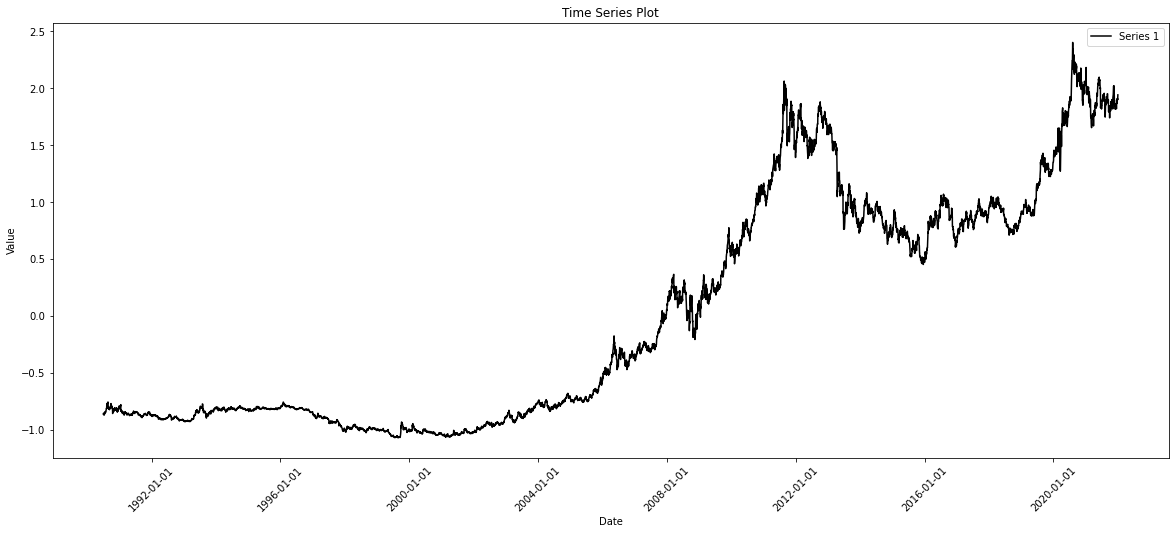

In [21]:
plot_series(df['ORO'])

## Aggiungo Oro e Rame come variabili esogene

In [32]:
# Seleziona la variabile target (PETROLIO) e le variabili esogene (ORO e RAME)
y = df['PETROLIO']
X = df[['ORO', 'RAME']]

# Riempie i valori mancanti con il metodo di riempimento in avanti
y = pd.Series(y, index=dates).fillna(method='ffill')

X = X.reindex(dates).fillna(method='ffill')

# Crea la ForecastingHorizon
fh = ForecastingHorizon(np.arange(3650) + 1)

In [33]:
# Suddividi i dati in set di addestramento e test
y_train, y_test, X_train, X_test = temporal_train_test_split(y, X, fh=fh)

In [35]:
forecaster = AutoARIMA()
forecaster.fit(y_train, X_train)
y_pred = forecaster.predict(fh, X=X_test)

plot_series(y_train, y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


KeyboardInterrupt: 

## Aggiungo tutte le variabili esogene (con time frame giornaliero) che ho a disposizione

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


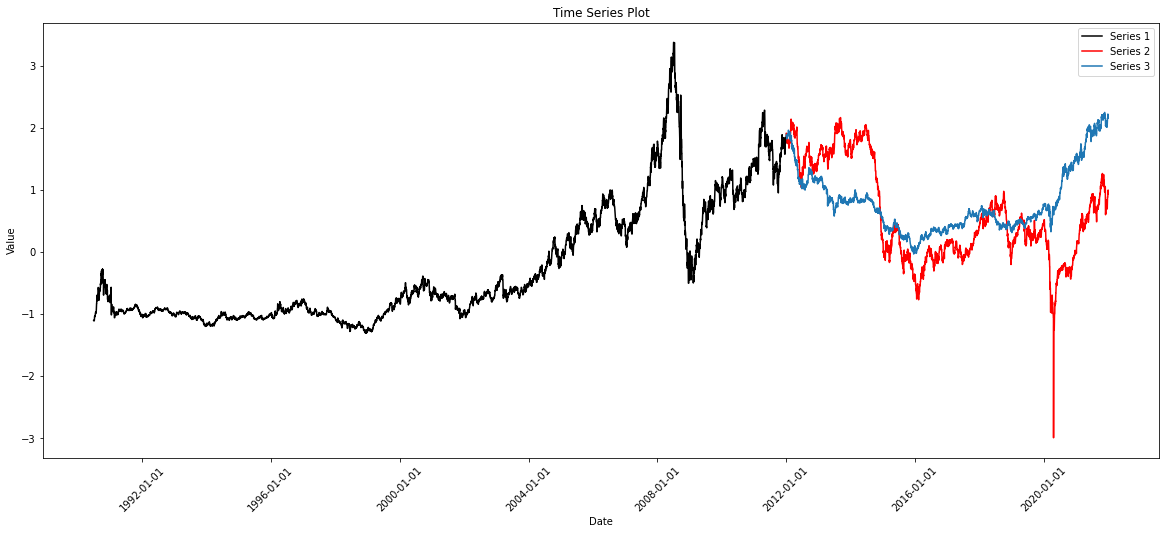

In [9]:
y = df['PETROLIO']

X = df[['GAS', 'Vol.GAS', 'RAME', 'Vol.RAME', 'ORO', 'Vol.ORO', 'NASDAQ',
       'Vol.NASDAQ', 'S&P500', 'DJI', 'Vol.DJI', 'USDCHF', 'USDJPY', 'USDEUR',
       'USDGBP', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr',
       '10 Yr', '30 Yr', 'VIX', 'DollarIndex', 'Vol.DollarIndex']]

# Riempie i valori mancanti con il metodo di riempimento in avanti
y = pd.Series(y, index=dates).fillna(method='ffill')
X = X.reindex(dates).fillna(method='ffill')

# Crea la ForecastingHorizon
fh = ForecastingHorizon(np.arange(3650) + 1)

# Suddividi i dati in set di addestramento e test
y_train, y_test, X_train, X_test = temporal_train_test_split(y, X, fh=fh)

forecaster = AutoARIMA()
forecaster.fit(y_train, X_train)
y_pred = forecaster.predict(fh, X=X_test)

plot_series(y_train, y_test, y_pred)

## New observations

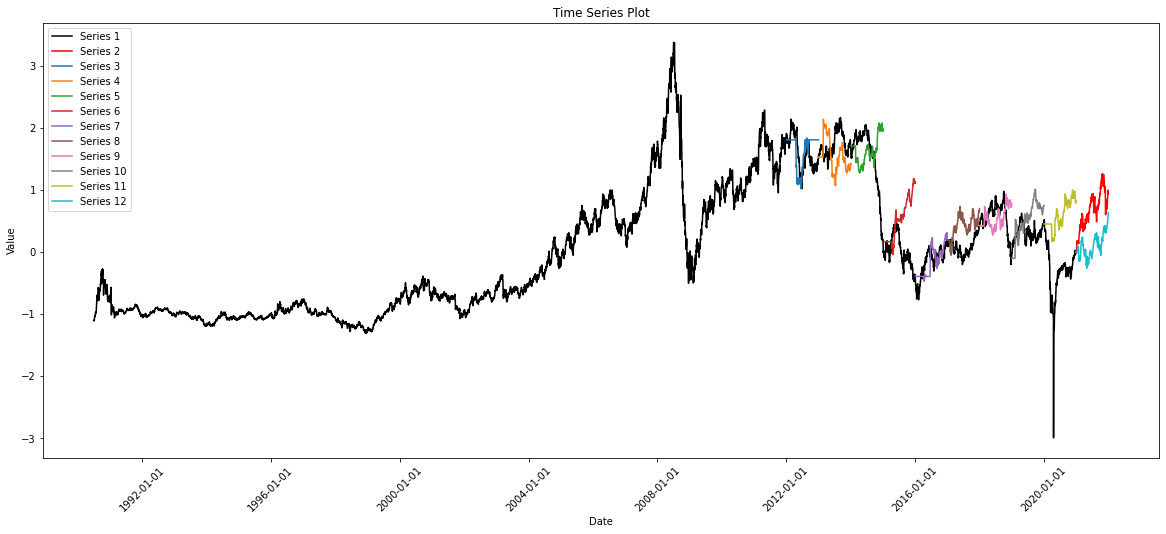

In [10]:
y = df['PETROLIO']

y = pd.Series(y, index = dates).fillna(method='ffill')

fh = ForecastingHorizon(np.arange(365) + 1)

y_train, y_test = temporal_train_test_split(y, fh=fh)

regressor = KNeighborsRegressor(n_neighbors=3)
forecaster = make_reduction(regressor, strategy="recursive", window_length=365)

cv = ExpandingWindowSplitter(step_length=365, fh=fh, initial_window=len(y)-3650)
results = evaluate(
    forecaster=forecaster, y=y, cv=cv, strategy="refit", return_data=True
)

#results.iloc[:, :5].head(10)

plot_series(*[y_train, y_test] + [results["y_pred"].iloc[i] for i in range(len(results))])

## New observations with exogenous data

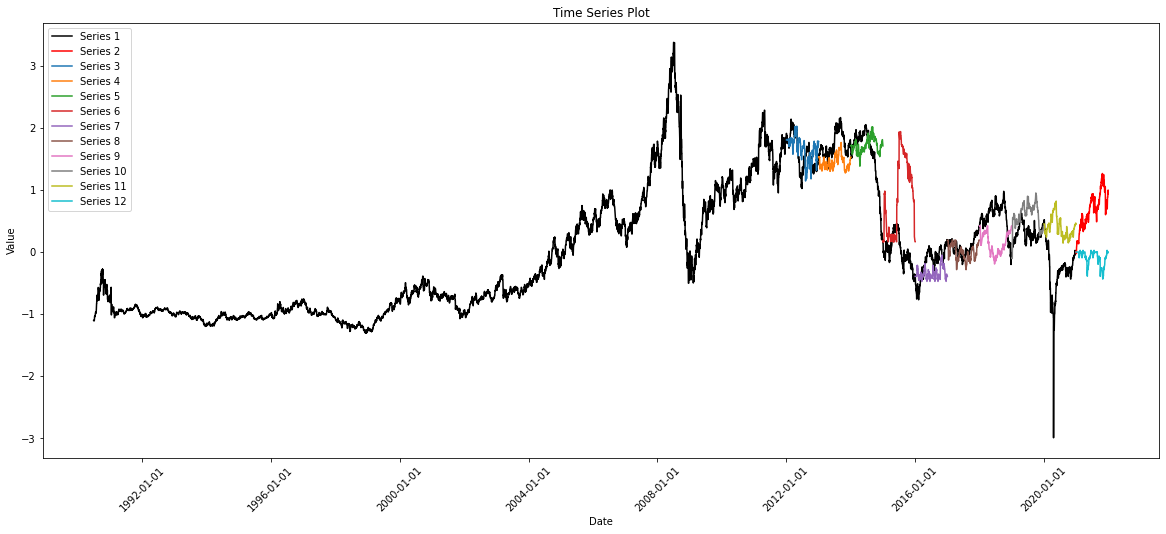

In [11]:
y = df['PETROLIO']

X = df[['GAS', 'Vol.GAS', 'RAME', 'Vol.RAME', 'ORO', 'Vol.ORO', 'NASDAQ',
       'Vol.NASDAQ', 'S&P500', 'DJI', 'Vol.DJI', 'USDCHF', 'USDJPY', 'USDEUR',
       'USDGBP', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr',
       '10 Yr', '30 Yr', 'VIX', 'DollarIndex', 'Vol.DollarIndex']]

y = pd.Series(y, index = dates).fillna(method='ffill')
X = X.reindex(dates).fillna(method='ffill')

fh = ForecastingHorizon(np.arange(365) + 1)

y_train, y_test, X_train, X_test = temporal_train_test_split(y, X, fh=fh)

regressor = KNeighborsRegressor(n_neighbors=3)
forecaster = make_reduction(regressor, strategy="recursive", window_length=365)

cv = ExpandingWindowSplitter(step_length=365, fh=fh, initial_window=len(y)-3650) #Ogni anno faccio il forecasting sull'anno dopo
results = evaluate(forecaster, cv, y, X, strategy="refit", return_data=True)

#results.iloc[:, :5].head(10)

plot_series(*[y_train, y_test] + [results["y_pred"].iloc[i] for i in range(len(results))])

## Ogni trimestre a partire da Q1-2012 (compreso) faccio il forecasting del trimestre successivo

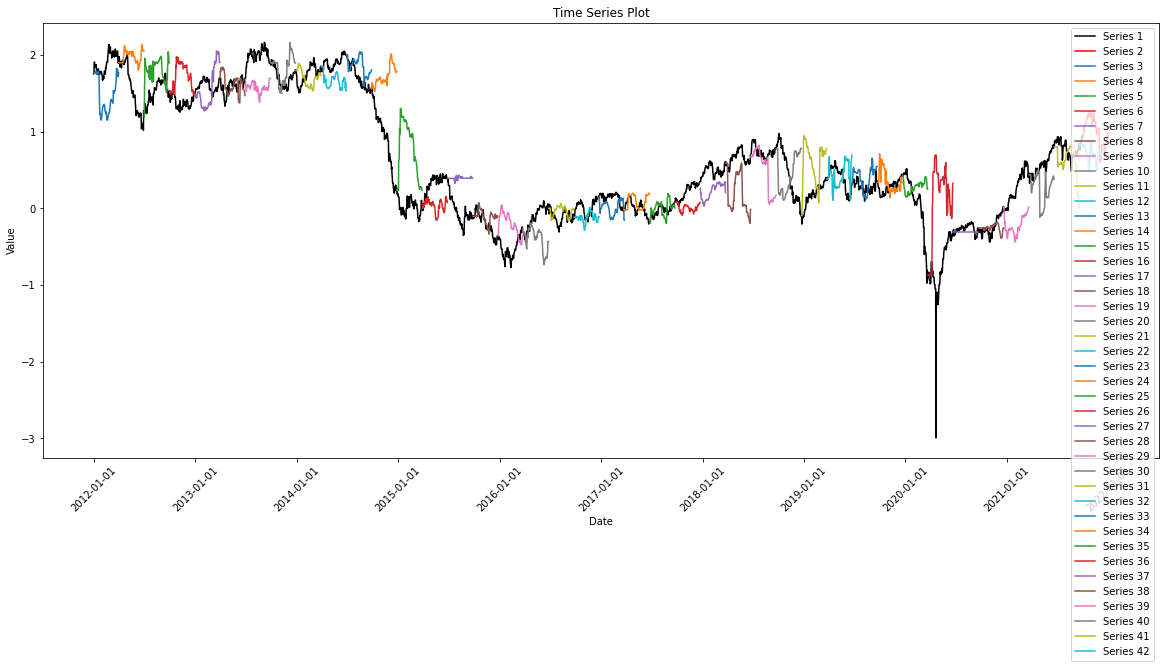

In [14]:
y = df['PETROLIO']

X = df[['GAS', 'Vol.GAS', 'RAME', 'Vol.RAME', 'ORO', 'Vol.ORO', 'NASDAQ',
       'Vol.NASDAQ', 'S&P500', 'DJI', 'Vol.DJI', 'USDCHF', 'USDJPY', 'USDEUR',
       'USDGBP', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr',
       '10 Yr', '30 Yr', 'VIX', 'DollarIndex', 'Vol.DollarIndex']]

y = pd.Series(y, index = dates).fillna(method='ffill')
X = X.reindex(dates).fillna(method='ffill')

fh = ForecastingHorizon(np.arange(91) + 1)

y_train, y_test, X_train, X_test = temporal_train_test_split(y, X, fh=fh)

regressor = KNeighborsRegressor(n_neighbors=3)
forecaster = make_reduction(regressor, strategy="recursive", window_length=91)

cv = ExpandingWindowSplitter(step_length=91, fh=fh, initial_window=len(y)-3653) #forecasting trimestrale
results = evaluate(forecaster, cv, y, X, strategy="refit", return_data=True)

#results.iloc[:, :5].head(10)

plot_series(*[y_train[len(y)-3653:], y_test] + [results["y_pred"].iloc[i] for i in range(len(results))])

## Modifico il codice di prima mettendo n_neighbors=2

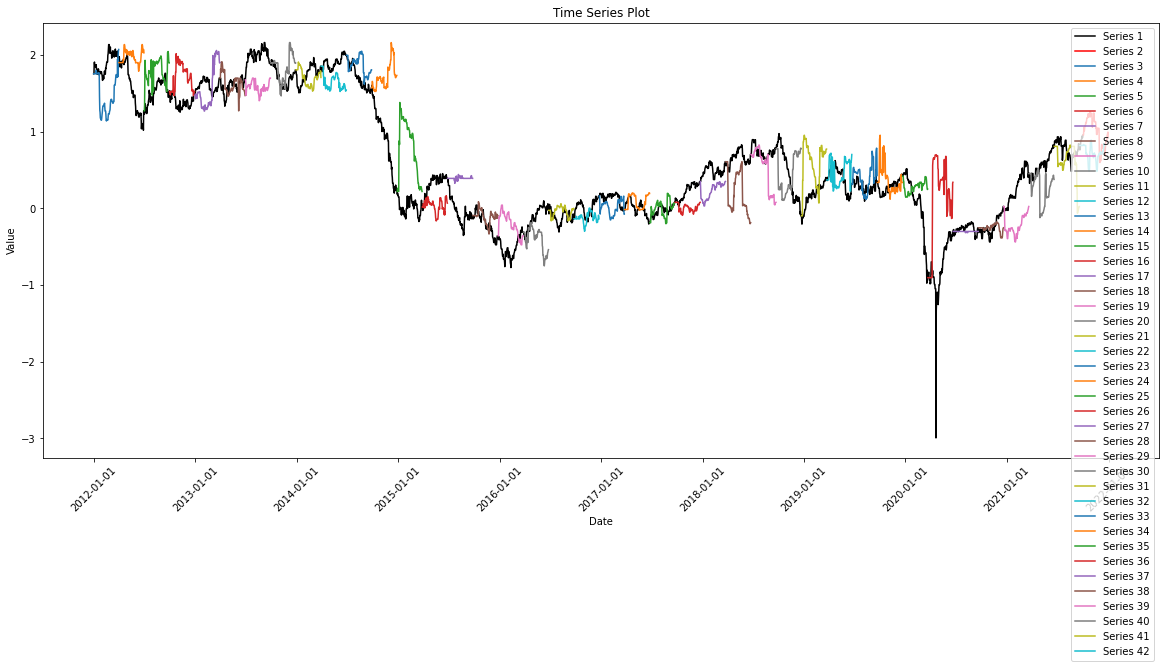

In [15]:
y = df['PETROLIO']

X = df[['GAS', 'Vol.GAS', 'RAME', 'Vol.RAME', 'ORO', 'Vol.ORO', 'NASDAQ',
       'Vol.NASDAQ', 'S&P500', 'DJI', 'Vol.DJI', 'USDCHF', 'USDJPY', 'USDEUR',
       'USDGBP', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr',
       '10 Yr', '30 Yr', 'VIX', 'DollarIndex', 'Vol.DollarIndex']]

y = pd.Series(y, index = dates).fillna(method='ffill')
X = X.reindex(dates).fillna(method='ffill')

fh = ForecastingHorizon(np.arange(91) + 1)

y_train, y_test, X_train, X_test = temporal_train_test_split(y, X, fh=fh)

regressor = KNeighborsRegressor(n_neighbors=2)
forecaster = make_reduction(regressor, strategy="recursive", window_length=91)

cv = ExpandingWindowSplitter(step_length=91, fh=fh, initial_window=len(y)-3653) #forecasting trimestrale
results = evaluate(forecaster, cv, y, X, strategy="refit", return_data=True)

#results.iloc[:, :5].head(10)

plot_series(*[y_train[len(y)-3653:], y_test] + [results["y_pred"].iloc[i] for i in range(len(results))])

## Modifico il codice di prima mettendo n_neighbors=5

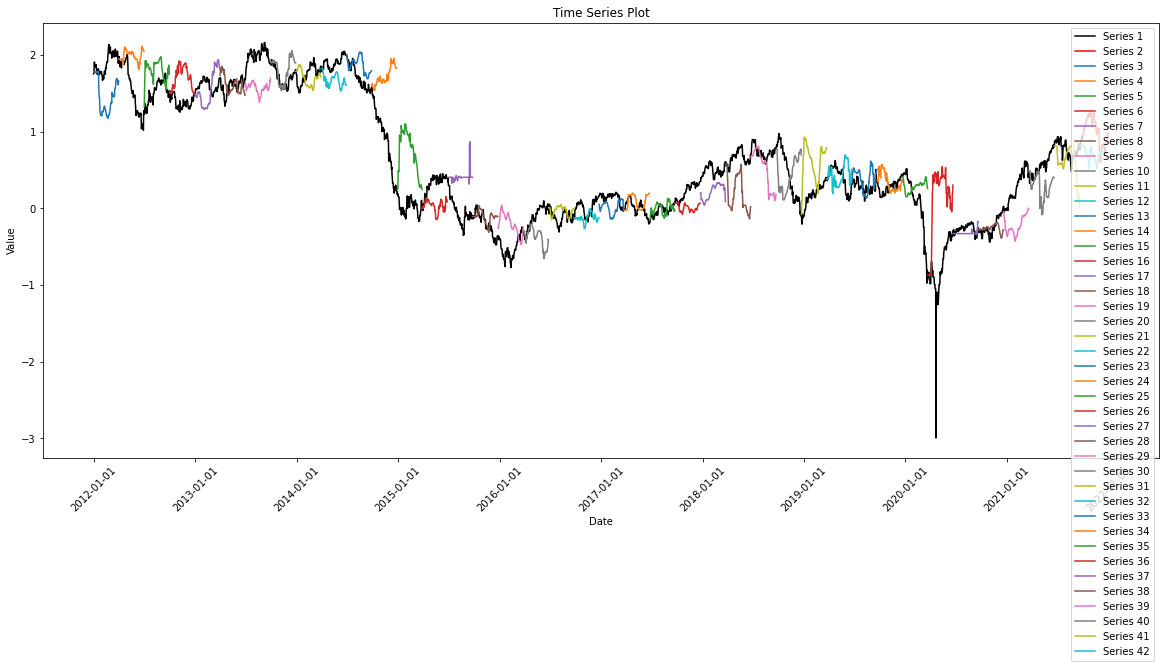

In [16]:
y = df['PETROLIO']

X = df[['GAS', 'Vol.GAS', 'RAME', 'Vol.RAME', 'ORO', 'Vol.ORO', 'NASDAQ',
       'Vol.NASDAQ', 'S&P500', 'DJI', 'Vol.DJI', 'USDCHF', 'USDJPY', 'USDEUR',
       'USDGBP', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr',
       '10 Yr', '30 Yr', 'VIX', 'DollarIndex', 'Vol.DollarIndex']]

y = pd.Series(y, index = dates).fillna(method='ffill')
X = X.reindex(dates).fillna(method='ffill')

fh = ForecastingHorizon(np.arange(91) + 1)

y_train, y_test, X_train, X_test = temporal_train_test_split(y, X, fh=fh)

regressor = KNeighborsRegressor(n_neighbors=5)
forecaster = make_reduction(regressor, strategy="recursive", window_length=91)

cv = ExpandingWindowSplitter(step_length=91, fh=fh, initial_window=len(y)-3653) #forecasting trimestrale
results = evaluate(forecaster, cv, y, X, strategy="refit", return_data=True)

#results.iloc[:, :5].head(10)

plot_series(*[y_train[len(y)-3653:], y_test] + [results["y_pred"].iloc[i] for i in range(len(results))])

## Modifico il codice di prima mettendo n_neighbors=10

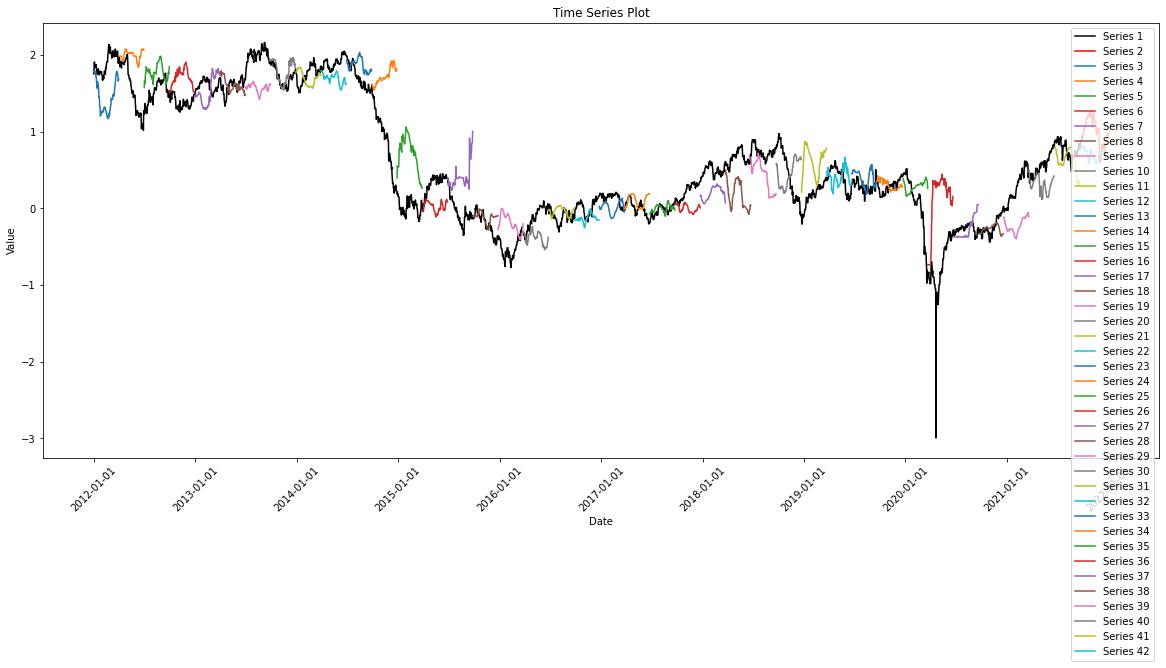

In [17]:
y = df['PETROLIO']

X = df[['GAS', 'Vol.GAS', 'RAME', 'Vol.RAME', 'ORO', 'Vol.ORO', 'NASDAQ',
       'Vol.NASDAQ', 'S&P500', 'DJI', 'Vol.DJI', 'USDCHF', 'USDJPY', 'USDEUR',
       'USDGBP', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr',
       '10 Yr', '30 Yr', 'VIX', 'DollarIndex', 'Vol.DollarIndex']]

y = pd.Series(y, index = dates).fillna(method='ffill')
X = X.reindex(dates).fillna(method='ffill')

fh = ForecastingHorizon(np.arange(91) + 1)

y_train, y_test, X_train, X_test = temporal_train_test_split(y, X, fh=fh)

regressor = KNeighborsRegressor(n_neighbors=10)
forecaster = make_reduction(regressor, strategy="recursive", window_length=91)

cv = ExpandingWindowSplitter(step_length=91, fh=fh, initial_window=len(y)-3653) #forecasting trimestrale
results = evaluate(forecaster, cv, y, X, strategy="refit", return_data=True)

#results.iloc[:, :5].head(10)

plot_series(*[y_train[len(y)-3653:], y_test] + [results["y_pred"].iloc[i] for i in range(len(results))])

## Uso come regressore un MLP semplice

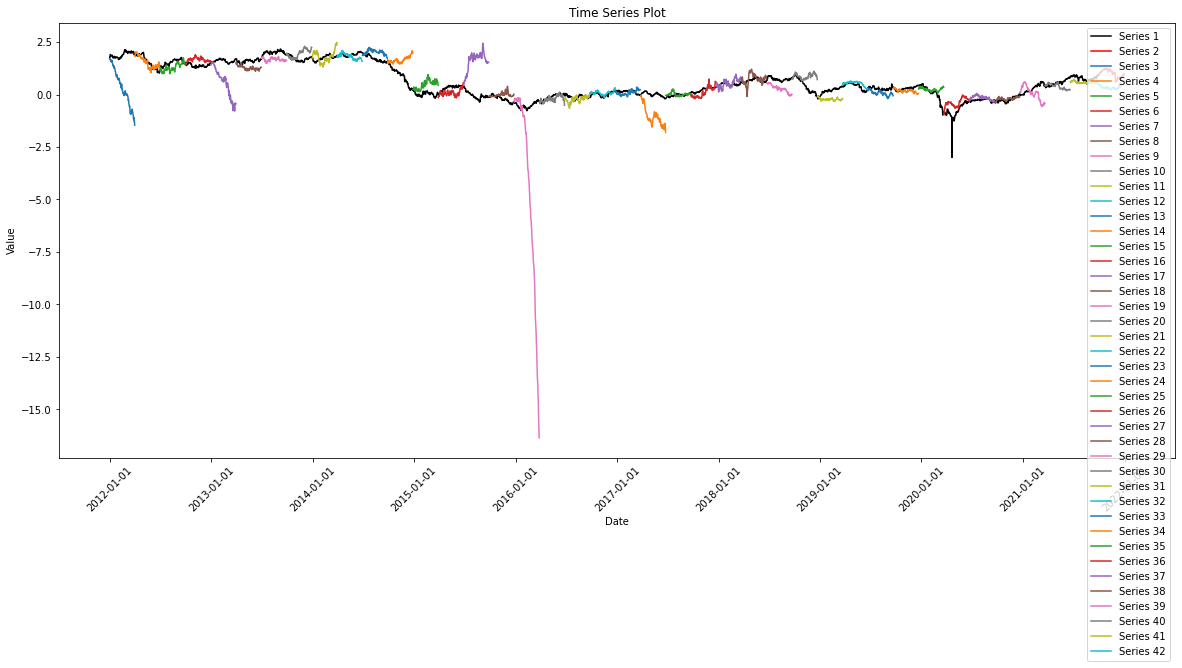

In [19]:
from sklearn.neural_network import MLPRegressor

y = df['PETROLIO']

X = df[['GAS', 'Vol.GAS', 'RAME', 'Vol.RAME', 'ORO', 'Vol.ORO', 'NASDAQ',
       'Vol.NASDAQ', 'S&P500', 'DJI', 'Vol.DJI', 'USDCHF', 'USDJPY', 'USDEUR',
       'USDGBP', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr',
       '10 Yr', '30 Yr', 'VIX', 'DollarIndex', 'Vol.DollarIndex']]

y = pd.Series(y, index = dates).fillna(method='ffill')
X = X.reindex(dates).fillna(method='ffill')

fh = ForecastingHorizon(np.arange(91) + 1)

y_train, y_test, X_train, X_test = temporal_train_test_split(y, X, fh=fh)

regressor = MLPRegressor(hidden_layer_sizes=(8, 16), 
                         activation='relu', 
                         solver='adam', 
                         max_iter=500)

forecaster = make_reduction(regressor, strategy="recursive", window_length=91)

cv = ExpandingWindowSplitter(step_length=91, fh=fh, initial_window=len(y)-3653) #forecasting trimestrale
results = evaluate(forecaster, cv, y, X, strategy="refit", return_data=True)

#results.iloc[:, :5].head(10)

plot_series(*[y_train[len(y)-3653:], y_test] + [results["y_pred"].iloc[i] for i in range(len(results))])

In [39]:
results.iloc[:, :5].head(10)

,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff
0,0.813991,8.195176,0.029760,7853,2011-12-31
1,0.107607,8.573650,0.030387,7944,2012-03-31
2,0.158720,8.800916,0.031429,8035,2012-06-30
3,0.211764,7.613069,0.032037,8126,2012-09-29
4,0.646059,9.595302,0.030083,8217,2012-12-29
5,0.199028,8.916973,0.031116,8308,2013-03-30
6,0.166228,7.989145,0.029666,8399,2013-06-29
7,0.171925,13.462232,0.043939,8490,2013-09-28
8,0.158641,11.198535,0.031491,8581,2013-12-28
9,0.084015,12.722384,0.032029,8672,2014-03-29


## Pipeline